# Student Career Path and Decision-Making Survey

# Introduction

Our society faces a significant social problem concerning the intricate relationship between students' career choices and their overall well-being and academic performance. The path students choose after their educational journey plays a pivotal role in shaping their lives and future prospects. The decisions they make during this critical phase can either lead to success, contentment, and fulfillment or result in distress, anxiety, and academic setbacks. Unfortunately, the process of career decision-making poses numerous challenges for students, leaving many grappling with uncertainty, fear, and confusion.

In [1]:
#Load libraries
#Data processing and Data Manipulation
import pandas as pd
#Calculation & array usage
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords


# Load Data

In [2]:
df = pd.read_csv("processed_data.csv")

In [3]:
df.head()

,gender,confidence_in_career,career_decision_factors,How_did you_choose_your_career_path?,career_advice_sought,career_choice_pressure,career_alignment,doubts_about_career,confidence_in_switching_career,career_path_and_academic_failure,school_career_counseling
0,1,1,2,4,0,1,1,1,0,1,1
1,1,1,4,1,0,0,1,0,0,1,1
2,1,0,2,2,0,1,0,1,1,1,1
3,0,1,2,1,0,0,0,1,0,1,1
4,1,1,3,2,0,1,0,1,1,0,1


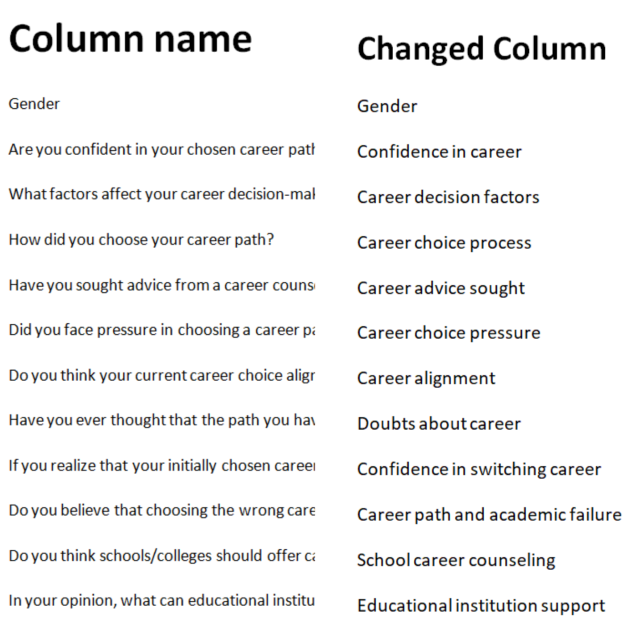

In [30]:
df.columns

Index(['gender', 'confidence_in_career', 'career_decision_factors',
       'How_did you_choose_your_career_path? ', 'career_advice_sought',
       'career_choice_pressure', 'career_alignment', 'doubts_about_career',
       'confidence_in_switching_career', 'career_path_and_academic_failure',
       'school_career_counseling'],
      dtype='object')

# Exploratory Analysis

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'confidence_in_career'}>,
        <AxesSubplot:title={'center':'career_decision_factors'}>],
       [<AxesSubplot:title={'center':'How_did you_choose_your_career_path? '}>,
        <AxesSubplot:title={'center':'career_advice_sought'}>,
        <AxesSubplot:title={'center':'career_choice_pressure'}>],
       [<AxesSubplot:title={'center':'career_alignment'}>,
        <AxesSubplot:title={'center':'doubts_about_career'}>,
        <AxesSubplot:title={'center':'confidence_in_switching_career'}>],
       [<AxesSubplot:title={'center':'career_path_and_academic_failure'}>,
        <AxesSubplot:title={'center':'school_career_counseling'}>,
        <AxesSubplot:>]], dtype=object)

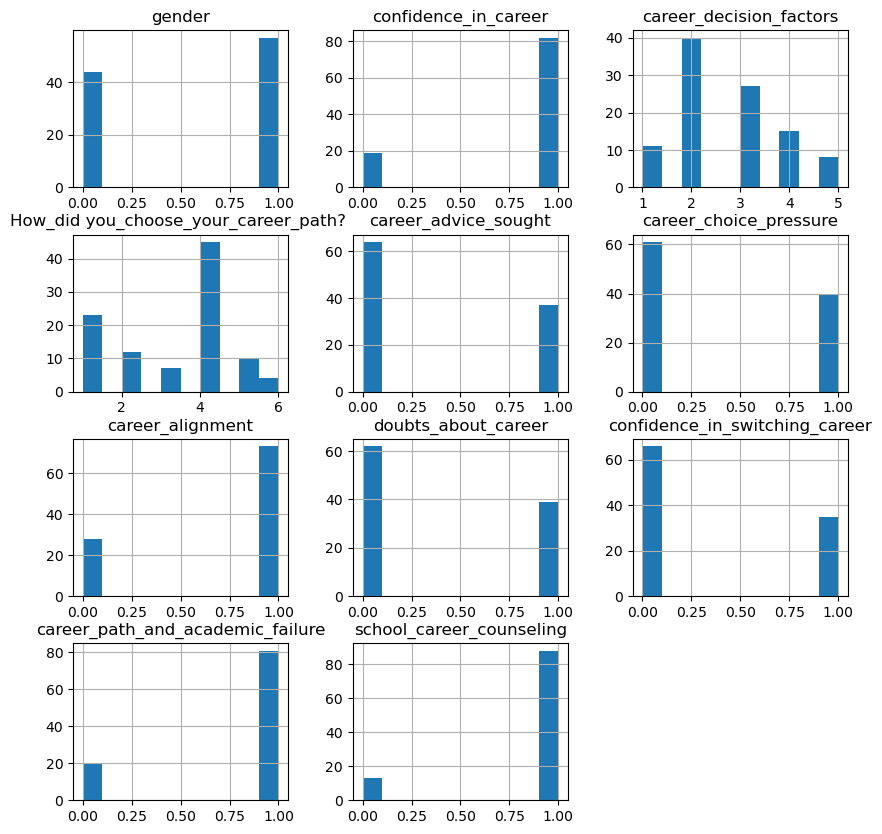

In [5]:
df.hist(figsize=(10,10))

# Proportion of gender:

In [6]:
df['gender'].value_counts()

1    57
0    44
Name: gender, dtype: int64

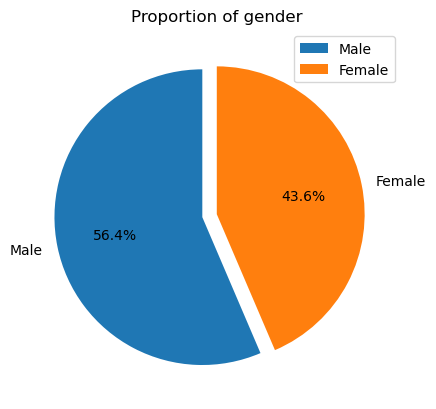

In [7]:
plt.pie(df['gender'].value_counts(),labels = ["Male","Female"],autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["Male","Female"])
plt.title('Proportion of gender')
plt.show()

# Are you confident in your chosen career path?

In [8]:
df['confidence_in_career'].value_counts() 

1    82
0    19
Name: confidence_in_career, dtype: int64

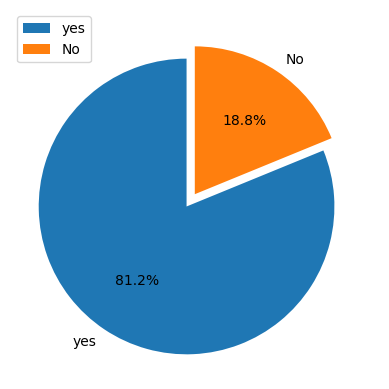

In [9]:
plt.pie(df['confidence_in_career'].value_counts(),labels = ["yes","No"],autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["yes","No"])
plt.show()

# What factors effect your career decision-making process?

In [10]:
df['career_decision_factors'].value_counts() 

2    40
3    27
4    15
1    11
5     8
Name: career_decision_factors, dtype: int64

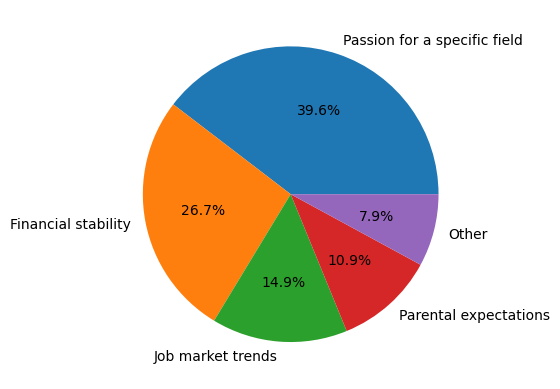

In [11]:
plt.pie(df['career_decision_factors'].value_counts(),labels = ["Passion for a specific field","Financial stability","Job market trends","Parental expectations","Other"],autopct ="%.01f%%")
plt.show()

# How did you choose your career path? 

In [12]:
df['How_did you_choose_your_career_path? '].value_counts() 

4    45
1    23
2    12
5    10
3     7
6     4
Name: How_did you_choose_your_career_path? , dtype: int64

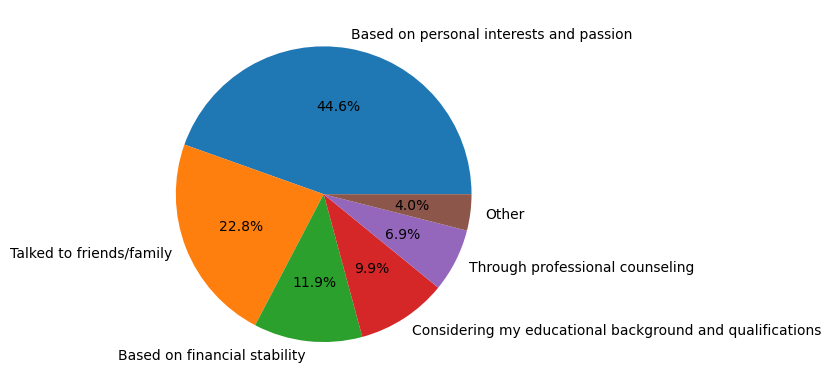

In [13]:
plt.pie(df['How_did you_choose_your_career_path? '].value_counts(),labels = ["Based on personal interests and passion","Talked to friends/family","Based on financial stability","Considering my educational background and qualifications","Through professional counseling","Other"],autopct ="%.01f%%")
plt.show()

# Have you sought advice from a career counselor or career advisor?

In [14]:
df['career_advice_sought'].value_counts() 

0    64
1    37
Name: career_advice_sought, dtype: int64

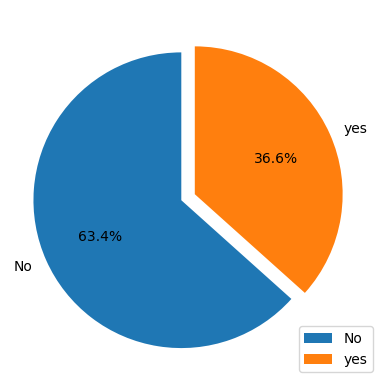

In [15]:
plt.pie(df['career_advice_sought'].value_counts(),labels = ["No","yes"],autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["No","yes"])
plt.show()

# Did you face pressure in choosing a career path?

In [16]:
df['career_choice_pressure'].value_counts() 

0    61
1    40
Name: career_choice_pressure, dtype: int64

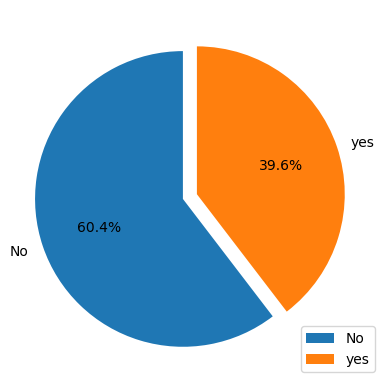

In [17]:
plt.pie(df['career_choice_pressure'].value_counts(),labels = ["No","yes"],autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["No","yes"])
plt.show()

# Do you think your current career choice aligns with your skills and strengths?

In [18]:
df['career_alignment'].value_counts() 

1    73
0    28
Name: career_alignment, dtype: int64

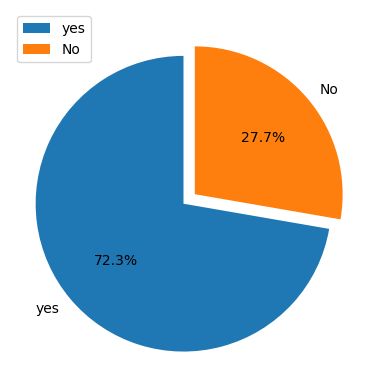

In [19]:
plt.pie(df['career_alignment'].value_counts(),labels = ["yes","No"] ,autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["yes","No"])
plt.show()

# Have you ever thought that the path you have chosen is not suitable for you? You could have done better if you had chosen another path.

In [20]:
df['doubts_about_career'].value_counts() 

0    62
1    39
Name: doubts_about_career, dtype: int64

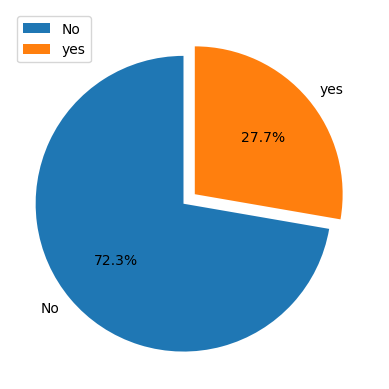

In [21]:
plt.pie(df['career_alignment'].value_counts(),labels = ["No","yes"] ,autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["No","yes"])
plt.show()

# If you realize that your initially chosen career path is not suitable for you, are you confident in shifting to a different career path?

In [22]:
df['confidence_in_switching_career'].value_counts() 

0    66
1    35
Name: confidence_in_switching_career, dtype: int64

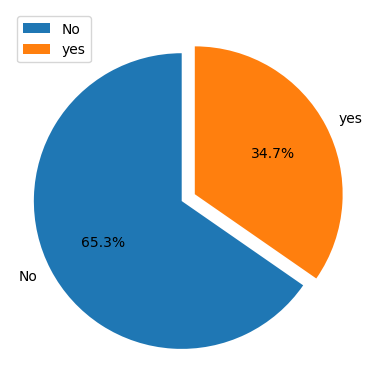

In [23]:
plt.pie(df['confidence_in_switching_career'].value_counts(),labels = ["No","yes"] ,autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["No","yes"])
plt.show()

# Do you believe that choosing the wrong career path can lead to academic failure?

In [24]:
df['career_path_and_academic_failure'].value_counts() 

1    81
0    20
Name: career_path_and_academic_failure, dtype: int64

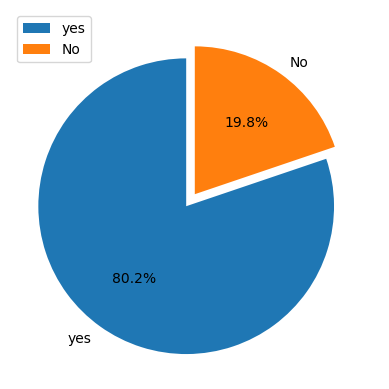

In [25]:
plt.pie(df['career_path_and_academic_failure'].value_counts(),labels = ["yes","No"] ,autopct ="%.01f%%", explode=[0.1, 0],startangle=90)
plt.legend(["yes","No"])
plt.show()

# Do you think schools/colleges should offer career counseling and guidance programs?


In [26]:
df['school_career_counseling'].value_counts() 

1    88
0    13
Name: school_career_counseling, dtype: int64

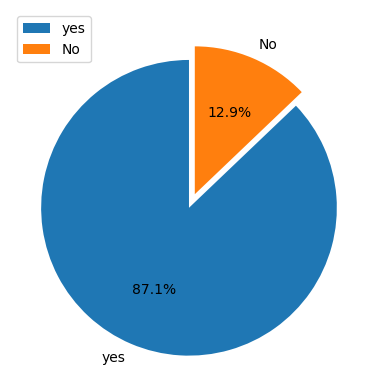

In [27]:
plt.pie(df['school_career_counseling'].value_counts(),labels = ["yes","No"] ,autopct ="%.01f%%", explode=[0.1, 0],startangle=90)
plt.legend(["yes","No"])
plt.show()